In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from scipy import stats


/Users/jordandarefsky/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [207]:
# copied from https://www.kaggle.com/jeffmoser/two-sigma-financial-modeling/kagglegym-api-overview/comments

with pd.HDFStore("train.h5", "r") as train:
    # Note that the "train" dataframe is the only dataframe in the file
    df = train.get("train")



In [5]:

idmap = {}

# np.max(df_id['id']) - 2158
ids = df['id'].unique()
for i in ids[:20]:
#     print i
    regr = linear_model.LinearRegression()
    df_id = df[df['id'] == i][np.isfinite(df['technical_30'])]
    
# # len(id_10['technical_30'])

    regr.fit(df_id['technical_30'].reshape(len(df_id), 1),df_id['y'])
    idmap[i] = regr.score(df_id['technical_30'].reshape(len(df_id), 1),df_id['y'])
    
    
#     g = sns.jointplot("technical_30", "y", data=id_10, kind="reg")

/Users/jordandarefsky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/jordandarefsky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/jordandarefsky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [6]:
[(w, idmap[w]) for w in sorted(idmap, key = idmap.get)]

[(39, 2.7243107500574123e-05),
 (31, 0.00011774729771618642),
 (44, 0.00021289103734412063),
 (41, 0.00027653024651952407),
 (43, 0.00028005768047623114),
 (60, 0.00041659568397467428),
 (59, 0.00059181140333941507),
 (12, 0.0010538178672728771),
 (40, 0.0012563561906936416),
 (54, 0.0013133574144724713),
 (68, 0.0014439293402819242),
 (26, 0.0027881896644227351),
 (10, 0.0047012342835034415),
 (49, 0.0048234983878202575),
 (38, 0.0054470757106543921),
 (11, 0.0077292797931137738),
 (27, 0.0079278865391406717),
 (25, 0.013947643479845562),
 (63, 0.028706492752977764),
 (62, 0.099274000841843679)]

/Users/jordandarefsky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


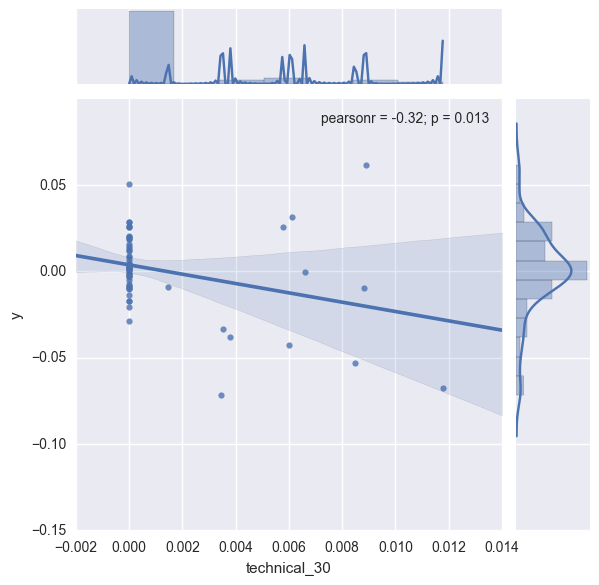

In [7]:
df_id = df[df['id'] == 62][np.isfinite(df['technical_30'])]
g = sns.jointplot("technical_30", "y", data=df_id, kind="reg")

In [10]:
# df1 = df.groupby('id')

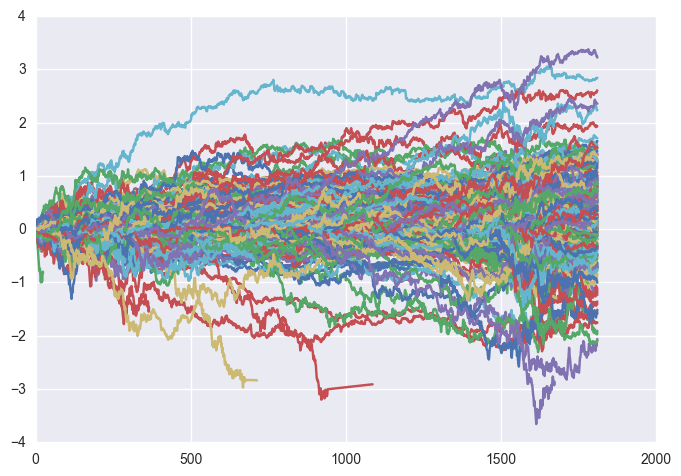

In [27]:
for i in ids:
    if i < 500:
        plt.plot(df[df['id'] == i]['timestamp'].values, np.cumsum(df[df['id'] == i]['y'].values))

    

In [23]:
np.cumsum(df[df['id'] == 10]['y'].values)

array([-0.01175345, -0.00590329, -0.00637976, -0.00116739, -0.07837793,
       -0.07229231, -0.10003926, -0.13334277, -0.13557731, -0.06850688,
       -0.07389554, -0.08556287, -0.11478837, -0.1137012 , -0.11891059,
       -0.20500472, -0.27343237, -0.26889482, -0.22664928, -0.22351633,
       -0.21841043, -0.2885254 , -0.30319116, -0.32617947, -0.32817578,
       -0.32165438, -0.33624399, -0.32223162, -0.32338265, -0.34550154,
       -0.33666879, -0.36102611, -0.3706446 , -0.33071855, -0.34688497,
       -0.32578364, -0.29646078, -0.30404091, -0.29576916, -0.28105381,
       -0.27959314, -0.28754812, -0.26068714, -0.27371386, -0.27918214,
       -0.28027019, -0.25214887, -0.22882043, -0.21376733, -0.21697064,
       -0.20899041, -0.21239036, -0.21842438, -0.21623595, -0.23804294,
       -0.2539691 , -0.21738994, -0.22681612, -0.13331831, -0.16969022,
       -0.13977212, -0.16211402, -0.17033224, -0.18092522, -0.12826914,
       -0.10055922, -0.09040042, -0.09708094, -0.08873596, -0.04

In [24]:
df[df['id'] == 10]['y'].values

array([ -1.17534492e-02,   5.85015584e-03,  -4.76462068e-04,
         5.21236146e-03,  -7.72105381e-02,   6.08562771e-03,
        -2.77469531e-02,  -3.33035104e-02,  -2.23452924e-03,
         6.70704246e-02,  -5.38866129e-03,  -1.16673289e-02,
        -2.92254947e-02,   1.08716742e-03,  -5.20938635e-03,
        -8.60941261e-02,  -6.84276372e-02,   4.53756191e-03,
         4.22455333e-02,   3.13294842e-03,   5.10589452e-03,
        -7.01149553e-02,  -1.46657629e-02,  -2.29883268e-02,
        -1.99630647e-03,   6.52139261e-03,  -1.45896133e-02,
         1.40123777e-02,  -1.15103787e-03,  -2.21188944e-02,
         8.83276202e-03,  -2.43573319e-02,  -9.61849838e-03,
         3.99260595e-02,  -1.61664262e-02,   2.11013258e-02,
         2.93228719e-02,  -7.58011919e-03,   8.27174727e-03,
         1.47153465e-02,   1.46066968e-03,  -7.95498490e-03,
         2.68609785e-02,  -1.30267208e-02,  -5.46826562e-03,
        -1.08805543e-03,   2.81213261e-02,   2.33284384e-02,
         1.50530888e-02,

array([   0,    0,    0, ..., 1812, 1812, 1812], dtype=int16)

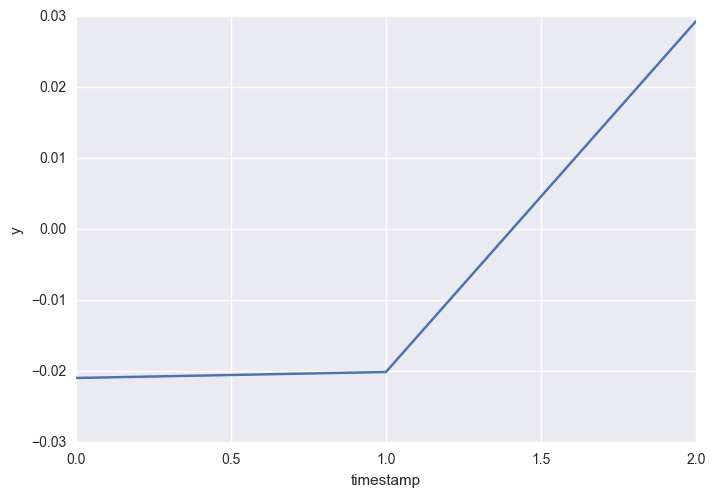

In [14]:
ax = sns.tsplot(data=df[df['id'] == 12], time = 'timestamp', unit = 'id',value = 'y')

In [92]:
df

id  timestamp  derived_0  derived_1  derived_2  derived_3  \
0          10          0   0.370326  -0.006316   0.222831  -0.213030   
1          11          0   0.014765  -0.038064  -0.017425   0.320652   
2          12          0  -0.010622  -0.050577   3.379575  -0.157525   
3          25          0        NaN        NaN        NaN        NaN   
4          26          0   0.176693  -0.025284  -0.057680   0.015100   
5          27          0   0.346856   0.166239  -6.080701  -0.992249   
6          31          0   0.072036   0.014931        NaN   0.014063   
7          38          0   0.300062   0.071251  -0.074451  -0.065292   
8          39          0  -0.003511  -0.034270   0.082372  -0.023937   
9          40          0  -0.083330   0.081935  -2.048438  -0.206856   
10         41          0   0.435826   1.797289   0.363570  -0.005651   
11         43          0        NaN        NaN        NaN        NaN   
12         44          0   0.034991  -0.019258   0.055769  -0.084496   
13         49          0        NaN   0.212615  -0.979520        NaN   
14         54          0   0.071704  -0.044019        NaN   0.038046   
15         59          0   0.116360   0.164506   0.156510  -0.129252   
16         60          0   0.026824  -0.024105  -0.028991   0.433277   
17         62          0   0.367122   0.675543  -0.008483  -0.367778   
18         63          0   0.453271  -0.036301   0.094657  -0.521106   
19         68          0  -0.122734   0.038939   0.148015   2.493512   
20         69          0  -0.062361  -0.063724   0.021274   0.032845   
21         70          0   0.175489  -0.024445  -0.034079  -0.020533   
22         76          0  -0.190705   0.006221  -0.056835   0.063464   
23         79          0   0.008503   0.048732   0.123793   0.266366   
24         80          0   0.043156   0.540945   0.278394   0.563343   
25         82          0   0.086832  -0.022962        NaN   0.006783   
26         83          0  -0.082307  -0.039761   0.102000  -0.798021   
27         85          0   0.005351  -0.031086   0.078334   0.417328   
28         87          0   0.045536   0.054391   0.330190  -0.816961   
29         90          0  -0.003925  -0.037522        NaN  -0.028244   
...       ...        ...        ...        ...        ...        ...   
1710726  2100       1812   0.079269  -0.021573  -0.033426  -0.333376   
1710727  2101       1812  -0.204339   0.134338   0.143729   0.702932   
1710728  2102       1812   0.095661  -0.051734        NaN   0.035816   
1710729  2104       1812   0.134436  -0.030198  -0.057608   0.016190   
1710730  2107       1812  -0.180348   0.061339        NaN   0.049680   
1710731  2108       1812  -0.247698   0.026739        NaN  -0.280510   
1710732  2109       1812  -0.425230   0.266186   0.075126   0.039726   
1710733  2114       1812  -2.337000   1.459039   3.495335  -0.347759   
1710734  2117       1812  -0.136062  -0.006129  -2.083220  -0.316265   
1710735  2118       1812  -2.458985   1.501635        NaN        NaN   
1710736  2120       1812        NaN        NaN  -0.398379        NaN   
1710737  2121       1812   0.126793   0.040152        NaN  -0.054294   
1710738  2126       1812  -0.181550  -0.039677  -0.082102  -0.140690   
1710739  2129       1812  -0.064731  -0.044927        NaN   0.615191   
1710740  2130       1812  -8.833108   3.455564   1.174958  -0.439014   
1710741  2131       1812  -0.149930   0.070203   0.363126  -0.010869   
1710742  2137       1812  -0.059745  -0.052186  -0.062670  -1.842369   
1710743  2138       1812   0.219608  -0.034336  -0.031817   0.270888   
1710744  2139       1812   0.062132   0.070332   0.351273   0.478199   
1710745  2140       1812   0.213264   0.029603        NaN  -0.273137   
1710746  2142       1812  -0.223395  -0.042492  -0.060381   0.016019   
1710747  2145       1812  -0.154051  -0.029331  -0.010545   0.019339   
1710748  2146       1812  -0.238458   0.316407   0.632261   0.531651   
1710749  2148       1812   0.089476  -0.038628   0.

In [75]:
# df['yc'] = df.groupby('id')['y'].transform(np.cumsum)

In [5]:
# df.groupby('id')['yc'].apply(lambda x: (x.iloc[len(x)-1]-x.iloc[0],len(x)))
df = df.set_index(['id','timestamp']).sortlevel(['id','timestamp'])
# df['yc'] = df.groupby(level = 'id')['y'].transform(np.cumsum)
# df.groupby('id')['yc'].last() - df.groupby('id')['yc'].first()
# df['prof'] = df.groupby('id').agg({'yc':lambda x: x.tail(1).iloc[0]-x.head(1).iloc[0]})

In [8]:
# def f(group):
#     return pd.DataFrame({'prof' : group.iloc[len(group)-1]-group.iloc[0], 'count' : len(group)}, index = [])

# df1.groupby(level = 'id')['yc'].apply(f)
# pd.DataFrame(df1.groupby(level = 'id')['yc'].apply(lambda x: (x.iloc[len(x)-1]-x.iloc[0],len(x))))
# type(df1)
df['yc'] = df.groupby(level = 'id')['y'].transform(np.cumsum)

In [86]:
df.head()

derived_0  derived_1  derived_2  derived_3  derived_4  \
id timestamp                                                          
0  167              NaN        NaN        NaN        NaN        NaN   
   168              NaN        NaN        NaN        NaN        NaN   
   169              NaN        NaN        NaN        NaN        NaN   
   170        -0.230583   0.488096    0.93592   0.028222  -0.083071   
   171        -0.230583   0.488096    0.93592   0.028222  -0.083071   

              fundamental_0  fundamental_1  fundamental_2  fundamental_3  \
id timestamp                                                               
0  167                  NaN            NaN            NaN            NaN   
   168                  NaN            NaN            NaN            NaN   
   169                  NaN            NaN            NaN            NaN   
   170            -0.240929            NaN       0.212425      -0.178111   
   171            -0.240929            NaN       0.212425      -0.178111   

              fundamental_5    ...     technical_37  technical_38  \
id timestamp                   ...                                  
0  167                  NaN    ...              NaN           NaN   
   168                  NaN    ...              NaN           NaN   
   169                  NaN    ...              NaN           NaN   
   170            -0.126889    ...              0.0           0.0   
   171            -0.126889    ...              0.0           0.0   

              technical_39  technical_40  technical_41  technical_42  \
id timestamp                                                           
0  167                 NaN           NaN           NaN           NaN   
   168                 NaN           NaN           NaN           NaN   
   169                 NaN           NaN           NaN           NaN   
   170                 0.0     -0.160478           NaN           0.0   
   171                 0.0     -0.160478           NaN           0.0   

              technical_43  technical_44         y        yc  
id timestamp                                                  
0  167                 NaN           NaN -0.007108 -0.007108  
   168                 NaN           NaN  0.001950 -0.005159  
   169                 NaN           NaN  0.017724  0.012566  
   170                 0.0           NaN  0.012934  0.025500  
   171                 0.0           NaN -0.025229  0.000271  

[5 rows x 110 columns]

In [97]:
gb = df.groupby(level = 'id')

In [110]:
# df1 = gb['yc'].apply(lambda x: pd.Series([x.iloc[len(x)-1]-x.iloc[0], len(x)], index = ['prof','count']))
df1 = gb['yc'].agg({'prof': lambda x: x.iloc[len(x)-1]-x.iloc[0], 'count' : lambda x: len(x)})

In [15]:
sns.jointplot(x="count", y="prof", data=df1)
df2 = pd.DataFrame(df)

NameError: name 'df1' is not defined

In [9]:
df2 = pd.DataFrame(df)

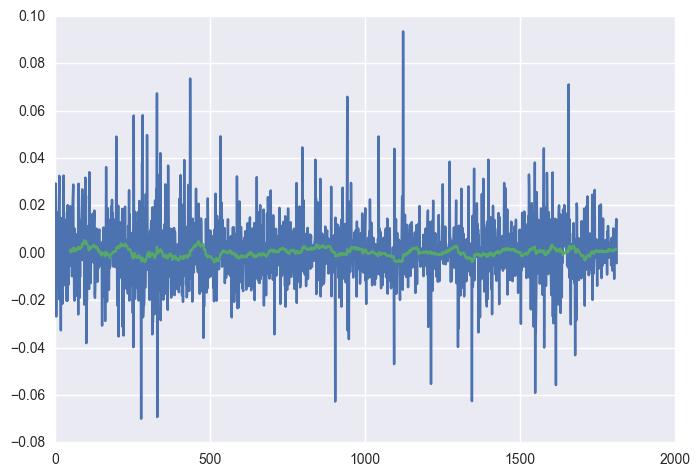

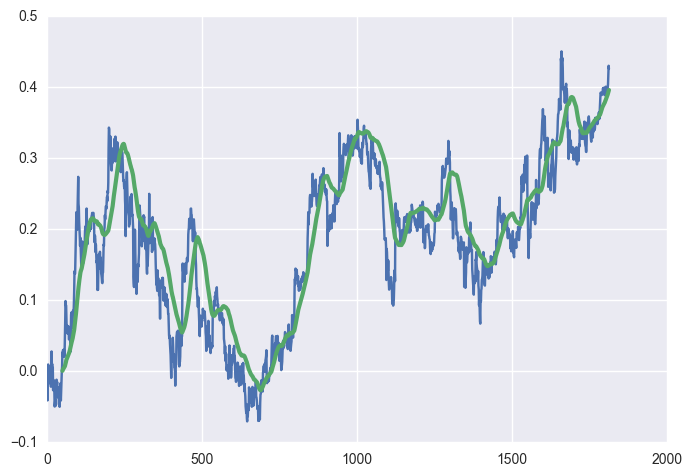

In [10]:
df2['ys'] = df.groupby(level = 'id')['y'].rolling(window=50, min_periods=50).mean().reset_index(0,drop=True)
df2['ysc'] = df.groupby(level = 'id')['ys'].transform(np.cumsum) # generate cumulative

df2['ya'] = df2['y'].diff()
df2['yas'] = df2.groupby(level = 'id')['ya'].rolling(window=50, min_periods=5).mean().reset_index(0,drop=True)

df2['py'] = df2['y'].shift(1)
# # df2['ya'] = df2['y']

id_g = 12
plt.figure(1)
plt.plot(df2.loc[id_g].index,df2.loc[id_g]['y'])
plt.plot(df2.loc[id_g].index,df2.loc[id_g]['ys']) #color = 'r'
plt.figure(2)
plt.plot(df2.loc[id_g].index,df2.loc[id_g]['yc'])
plt.plot(df2.loc[id_g].index,df2.loc[id_g]['ysc'],linewidth=3)

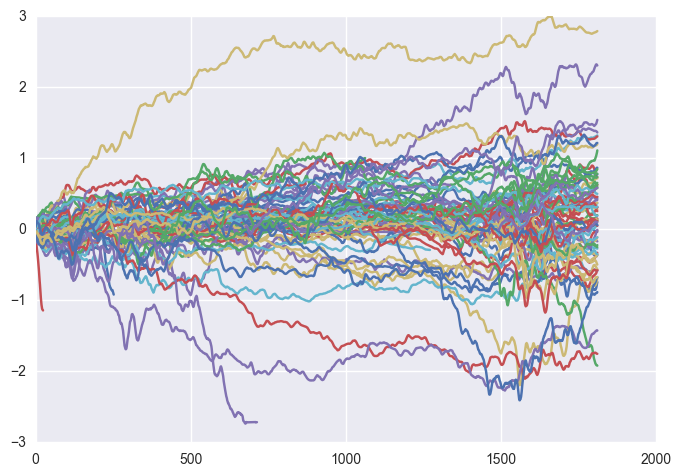

In [31]:
for i in df2.index.get_level_values(0).unique()[0:100]:
#     print(i)
    d = df2.loc[i]
    plt.plot(d.index,d['ysc'])

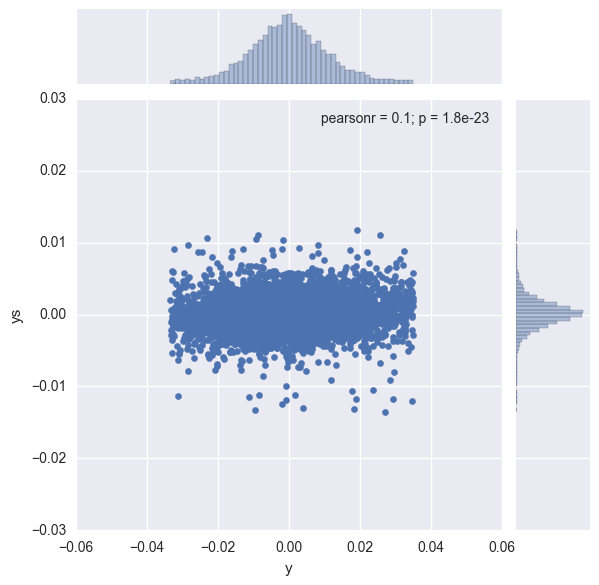

In [57]:
g = sns.jointplot(x="y", y="ys", data=df2[(df2['y'] < df2['y'].quantile(.95)) & (df2['y'] > df2['y'].quantile(.05))][0:10000])

In [29]:
dfna = df2.dropna().sample(50000)

In [72]:
q1 = df2['y'].quantile(.1)
q2 = df2['y'].quantile(.9)

dfna2 = dfna[(dfna['y'] > q1) & (dfna['y'] < q2)]
stats.linregress(dfna['y'].values,dfna['py'].values)

LinregressResult(slope=-0.022924279417079554, intercept=0.00034435522013711103, rvalue=-0.022990128133570938, pvalue=2.7284417693907775e-07, stderr=0.0044582373172701731)

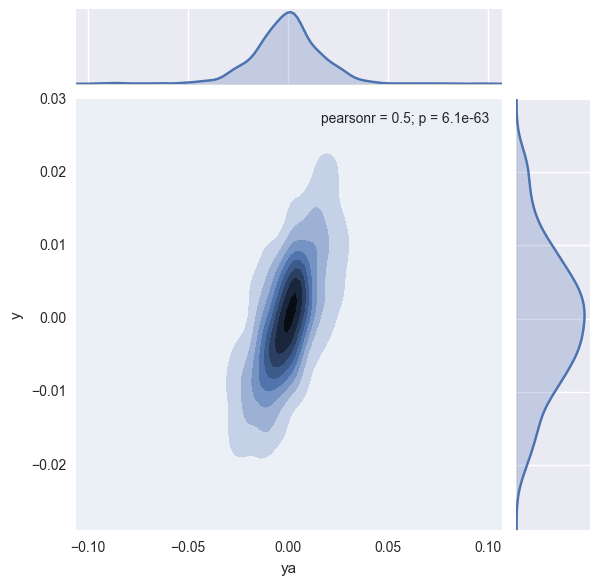

In [39]:

# sns.jointplot('ya','y',dfna2.sample(1000),kind="kde")


In [40]:

gb2 = df2.groupby(level = 'id')

In [119]:
cor = {}
# inds = df2.index.get_level_values(0).unique()[0:100]
# idr = df2.loc[list(inds)]
# idr = dfna
mean_vals = df2.mean()
idr = df2.fillna(mean_vals)
columns = list(idr.columns)[0:108]
print len(idr)
for c in columns:
    reg = stats.linregress(idr[c].values,idr['y'].values)
    cor[c] = (reg.slope,reg.rvalue,reg.pvalue)

1710756


In [120]:
[(x, cor[x]) for x in sorted(cor,key = lambda x: cor[x][0])]

[(u'technical_20',
  (-0.12817088383720091, -0.016507062171820935, 2.1351696213322712e-103)),
 (u'technical_28',
  (-0.0011854127538867716, -0.0013045176667973479, 0.087960662694790318)),
 (u'technical_5',
  (-0.00054352338498365885, -0.0010118179734892097, 0.1856972373174087)),
 (u'technical_27',
  (-0.0002687249720170282, -0.0080853895501691638, 3.8702105321088367e-26)),
 (u'technical_44',
  (-0.00024518866274735778, -0.00030587782813183489, 0.68910106493472068)),
 (u'technical_35',
  (-0.00024376911891025541, -0.0060019541676175686, 4.1480098670901573e-15)),
 (u'technical_36',
  (-0.0002158517976117264, -0.0058962664514953349, 1.2373064342904992e-14)),
 (u'technical_19',
  (-0.00020880259297627405, -0.0076405901867144348, 1.6237939255386385e-23)),
 (u'technical_40',
  (-0.00020842056096667444, -0.0028846336710448136, 0.00016130479833336055)),
 (u'fundamental_62',
  (-0.00018427839392537069, -0.0040062459273849235, 1.6055791433434006e-07)),
 (u'technical_9',
  (-0.0001812038264837409

In [101]:
def testscore(py,ay):
    reg = stats.linregress(py,ay)
    return reg.rvalue

In [134]:
mask = np.random.rand(len(df)) < 0.8
idr_train = idr[mask]
idr_test = idr[~mask]
regr = linear_model.LinearRegression()
regr.fit(idr_train['technical_20'].values.reshape(-1, 1),idr_train['y'].values.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [136]:
# idr2 = idr.sample(1000000)
ypred = regr.predict(idr_test['technical_20'].values.reshape(-1, 1))
testscore(ypred.flatten(),idr_test['y'].values)

0.015581512909480259

In [116]:
ypred.flatten()

array([ -7.78827668e-05,   3.41427067e-04,   4.89726502e-04, ...,
         4.89726502e-04,   1.49746835e-04,   4.43935346e-04])

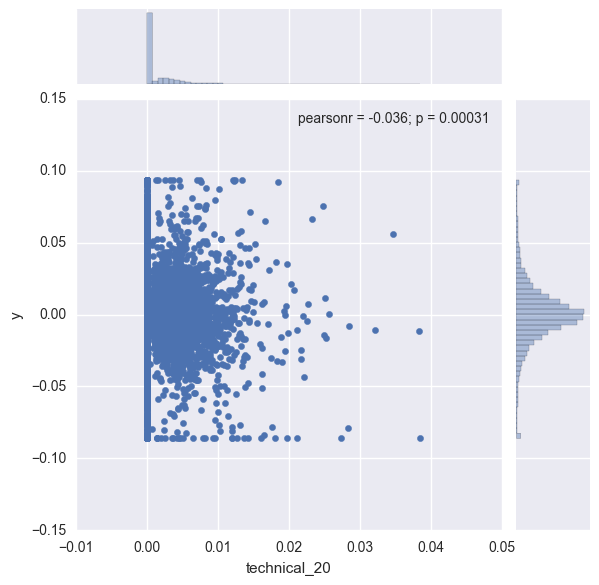

In [157]:
sns.jointplot('technical_20','y',data=df2[np.isfinite(df2['technical_20'])].sample(10000))

In [153]:
np.nanmean(df2[df2['technical_20']>0]['technical_20'])

0.0043784496

In [166]:
m1 = (np.isfinite(df2['technical_20']))
df2['y'][m1].mean(),df2[~m1]['y'].mean(),

(0.00022560149955097586, -0.001151490374468267)

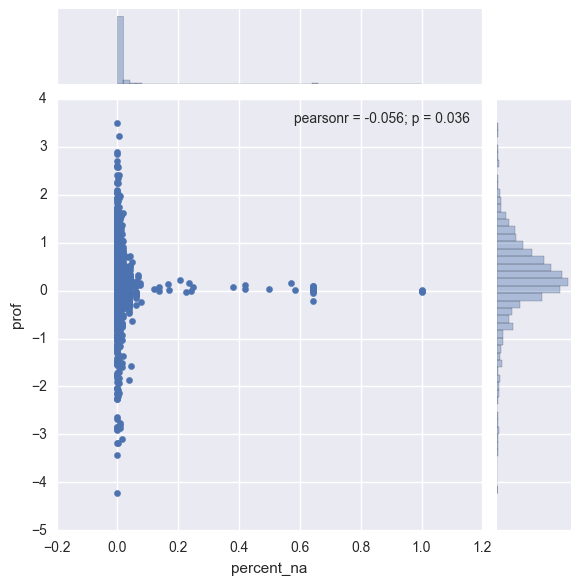

In [205]:
# len(df2[~m1]['y'])
# len(df2[m1]['y'])
t20df = df2.groupby(level = 'id').technical_20.agg({'count_na': lambda x: x.isnull().sum(),'percent_na': lambda x: float(x.isnull().sum())/len(x),'mean': np.mean})
t20df['prof'] = df2.groupby(level = 'id').yc.last()
sns.jointplot('percent_na','prof',t20df)

In [171]:
# for i in df2[m1].index.get_level_values(0).unique()[0:100]:
# #     print(i)
#     d = df2.loc[i]
#     plt.plot(d.index,d['ysc'])
    
# plt.figure(2)
# for i in df2[~m1].index.get_level_values(0).unique()[0:20]:
# #     print(i)
#     d = df2.loc[i]
#     plt.plot(d.index,d['ysc']) lolbad

In [199]:
t20df.head()

mean  count_na  percent_na      prof
id                                          
0   0.001171       8.0    0.004860  0.340262
6   0.000808       7.0    0.009615  0.112004
7   0.001357       7.0    0.004537  0.808206
10  0.002420       0.0    0.000000 -0.083679
11  0.000528       0.0    0.000000  0.285688

derived_0  derived_1  derived_2  derived_3  derived_4  \
id   timestamp                                                          
0    167              NaN        NaN        NaN        NaN        NaN   
     168              NaN        NaN        NaN        NaN        NaN   
     169              NaN        NaN        NaN        NaN        NaN   
     170        -0.230583   0.488096   0.935920   0.028222  -0.083071   
     171        -0.230583   0.488096   0.935920   0.028222  -0.083071   
     172        -0.230583   0.488096   0.935920   0.028222  -0.083071   
     173        -0.230583   0.488096   0.935920   0.028222  -0.083071   
     174        -0.230583   0.488096   0.935920   0.028222  -0.083071   
     175        -0.230583   0.488096   0.935920   0.028222  -0.083071   
     176        -0.230583   0.488096   0.935920   0.028222  -0.083071   
     177        -0.230583   0.488096   0.935920   0.028222  -0.083071   
     178        -0.230583   0.488096   0.935920   0.028222  -0.083071   
     179        -0.230583   0.488096   0.935920   0.028222  -0.083071   
     180        -0.230583   0.488096   0.935920   0.028222  -0.083071   
     181        -0.230583   0.488096   0.935920   0.028222  -0.083071   
     182        -0.230583   0.488096   0.935920   0.028222  -0.083071   
     183        -0.230583   0.488096   0.935920   0.028222  -0.083071   
     184        -0.230583   0.488096   0.935920   0.028222  -0.083071   
     185        -0.258631   0.464202   0.629588   0.021282  -0.116380   
     186        -0.265503   0.458348   0.554534   0.019581  -0.124540   
     187        -0.271432   0.453297   0.489780   0.018114  -0.131581   
     188        -0.276553   0.448934   0.433844   0.016847  -0.137663   
     189        -0.280982   0.445161   0.385478   0.015751  -0.142922   
     190        -0.284815   0.441896   0.343618   0.014803  -0.147474   
     191        -0.288134   0.439068   0.307361   0.013981  -0.151416   
     192        -0.291011   0.436617   0.275937   0.013269  -0.154833   
     193        -0.295671   0.432647   0.225041   0.012116  -0.160367   
     194        -0.297551   0.431046   0.204517   0.011651  -0.162599   
     195        -0.299183   0.429656   0.186694   0.011247  -0.164536   
     196        -0.300600   0.428449   0.171213   0.010897  -0.166220   
...                   ...        ...        ...        ...        ...   
2158 1783             NaN        NaN        NaN        NaN        NaN   
     1784             NaN        NaN        NaN        NaN        NaN   
     1785             NaN        NaN        NaN        NaN        NaN   
     1786             NaN        NaN        NaN        NaN        NaN   
     1787             NaN        NaN        NaN        NaN        NaN   
     1788             NaN        NaN        NaN        NaN        NaN   
     1789             NaN        NaN        NaN        NaN        NaN   
     1790             NaN        NaN        NaN        NaN        NaN   
     1791             NaN        NaN        NaN        NaN        NaN   
     1792             NaN        NaN        NaN        NaN        NaN   
     1793             NaN        NaN        NaN        NaN        NaN   
     1794             NaN        NaN        NaN        NaN        NaN   
     1795             NaN        NaN        NaN        NaN        NaN   
     1796             NaN        NaN        NaN        NaN        NaN   
     1797             NaN        NaN        NaN        NaN        NaN   
     1798             NaN        NaN        NaN        NaN        NaN   
     1799             NaN        NaN        NaN        NaN        NaN   
     1800             NaN        NaN        NaN        NaN        NaN   
     1801             NaN        NaN        NaN        NaN        NaN   
     1802             NaN        NaN        NaN        NaN        NaN   
     1803             NaN        NaN        NaN        NaN        NaN   
     1804             NaN        NaN        NaN        NaN        NaN   
 